In [2]:
import itertools
import random

import axelrod as axl
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import skopt
import tqdm
from skopt.plots import plot_convergence

In [3]:
import opt_mo

In [4]:
font = {'size'   : 10,
        'weight': 'bold'}
matplotlib.rc('font', **font)

In [4]:
def bayesian(opponents, n_calls=40):
    method_params={"n_random_starts": 20, "n_calls": n_calls}
    bounds = [(0, 0.9999) for _ in range(4)]
    objective = opt_mo.memory_one_best_response.prepare_objective_optimisation(
        opponents=opponents
    )

    result = skopt.gp_minimize(
        func=objective,
        dimensions=bounds,
        acq_func="EI",
        random_state=0,
        **method_params
    )
   
    return result

**example seed $\in 2$** explains the covergence function/check.

In [5]:
axl.seed(2)
random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]
best_response = opt_mo.get_memory_one_best_response(random_opponents)

In [6]:
res = bayesian(random_opponents)

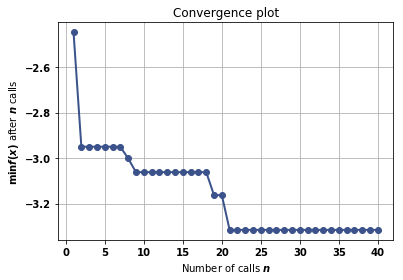

In [7]:
plot_convergence(res);

**Evolutionary case** for **Memory One strategies**

It's known that before including the cycle check in the history, for seed $\in [2]$ there was a cycle. 

In [8]:
best_resposnses, mem_one_histories = [], []
for seed in [2, 4]:
    axl.seed(seed)
    random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]

    best_ev_response, hist = opt_mo.get_evolutionary_best_response(random_opponents, 
                                                                    opt_mo.get_memory_one_best_response)
    best_resposnses.append(best_ev_response), mem_one_histories.append(hist)
    print('------------------')

Next generation.
Next generation.
------------------
Next generation.
Next generation.
Next generation.
------------------


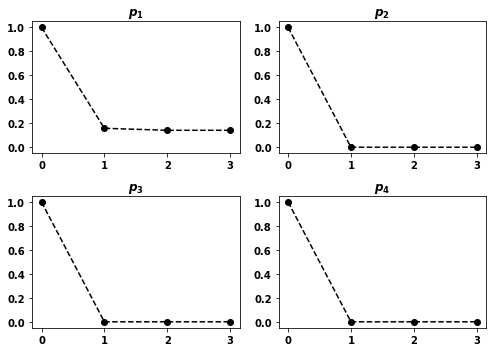

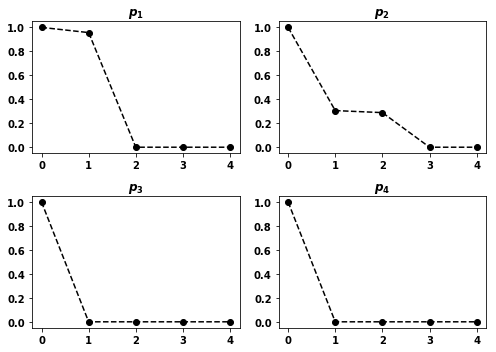

In [21]:
for j, hist in enumerate(mem_one_histories):
    points = [[history[i] for history in hist] for i in range(4)]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
    for i in range(4):
        axes = (int(i / 2), i % 2)
        ax[axes].plot(points[i], linestyle='--', marker='o', color='black'),
        ax[axes].set_title(r'$p_{}$'.format(i + 1))
        ax[axes].set_ylim(-0.05, 1.05)
    fig.tight_layout()

    fig.savefig('../img/evol{}.pdf'.format(j), bbox_inches='tight')

**Reactive case**

In [10]:
# reactive_best_resposnses, reactive_histories = [], []
# for seed in range(6, 9):  
#     axl.seed(seed)
#     random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]

#     best_ev_response, hist = opt_mo.get_evolutionary_best_response(random_opponents, 
#                                                                     opt_mo.get_reactive_best_response_with_bayesian)
#     reactive_best_resposnses.append(best_ev_response), reactive_histories.append(hist)
#     print('------------------')

In [11]:
# for hist in reactive_histories:
#     points = [[history[i] for history in hist] for i in range(2)]

#     fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6, 2.5))
#     for i in range(2):    
#         ax[i].plot(points[i], linestyle='--', marker='o', color='black'),
#         ax[i].set_title(r'$p_{}$'.format(i + 1))
#         ax[i].set_ylim(-0.05, 1.05)
#     fig.tight_layout()

**Now lets draw the cycle**

For memory one strategies.

In [12]:
axl.seed(2)
random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]

In [13]:
over_all_hist = []
initial = np.array([1, 1, 1, 1])
for _ in range(3):
    best_ev_response, hist = opt_mo.get_evolutionary_best_response(random_opponents, 
                                                                   opt_mo.get_memory_one_best_response,
                                                                   initial=initial)
    initial = best_ev_response
    over_all_hist.append(hist)

Next generation.
Next generation.


In [14]:
hist  = [item for sublist in over_all_hist for item in sublist]

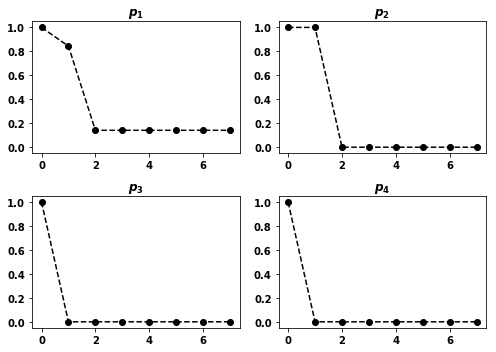

In [15]:
points = [[history[i] for history in hist] for i in range(4)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
for i in range(4):
    axes = (int(i / 2), i % 2)
    ax[axes].plot(points[i], linestyle='--', marker='o', color='black'),
    ax[axes].set_title(r'$p_{}$'.format(i + 1))
    ax[axes].set_ylim(-0.05, 1.05)
fig.tight_layout()

**With different intilias**

In [5]:
best_responses_initial, mem_one_histories_initial = [], []
for seed in [2, 4]:
    axl.seed(seed)
    random_opponents = [[random.random() for _ in range(4)] for _ in range(2)]
    
    initial = opt_mo.get_memory_one_best_response(random_opponents)

    best_ev_response, hist = opt_mo.get_evolutionary_best_response(random_opponents, 
                                                                   opt_mo.get_memory_one_best_response,
                                                                   initial=initial)
    best_responses_initial.append(best_ev_response), mem_one_histories_initial.append(hist)
    print('------------------')

Next generation.
------------------
Next generation.
------------------


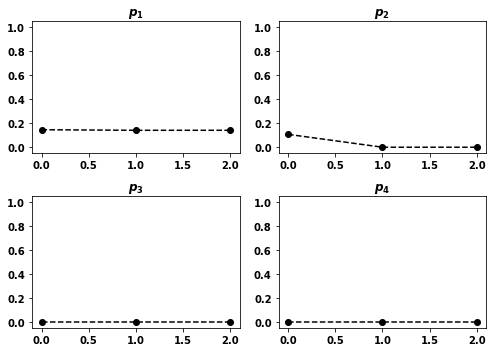

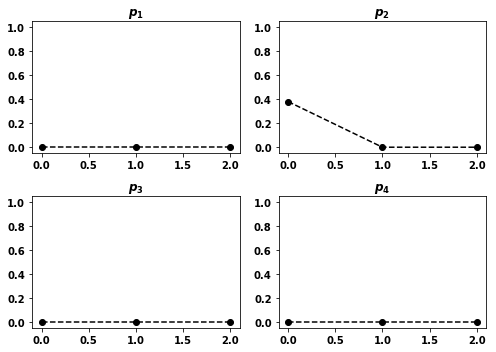

In [6]:
for i, hist in enumerate(mem_one_histories_initial):
    points = [[history[i] for history in hist] for i in range(4)]

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 5))
    for i in range(4):
        axes = (int(i / 2), i % 2)
        ax[axes].plot(points[i], linestyle='--', marker='o', color='black'),
        ax[axes].set_title(r'$p_{}$'.format(i + 1))
        ax[axes].set_ylim(-0.05, 1.05)
    fig.tight_layout()
    
    fig.savefig('../img/evol_initial_{}.pdf'.format(i), bbox_inches='tight')